Author:
Pragat Wagle

Assignment 4

Positive or Negative Text Classification

# Data Preprocessing and Preparation 

In [60]:
def readTxt(location):
    """
    Used to read the text file based on the specified file location.
    :param location: path of text file location
    :return: returns the opened file
    """ 
    file = open(location)
    return file;

In [61]:
import nltk.corpus
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

def dataPreprocessing(text, sentiment = '', testSet = False):
    """
    Cleans the text and assigns the sentiment to the cleaned text and appends it to an array
    param text: the text to be preprocessed, cleaned, and label assigned
    param sentiment: 1 for positive, 0 for negative, '' empty 
    param testSet: boolean to specify if it is a test set and will not have a sentiment assigned
    """
    cleanedText = []
    
    for line in text:
        # lowering text
        text = line.lower()
        # punctuation, URL, and @
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
        # stop words are common words within sentences that do not add value
        stop = stopwords.words('english')
        text = " ".join([word for word in text.split() if word not in (stop)])
        
        if testSet == False:
            cleanedText.append([sentiment, text])
        else:
            cleanedText.append(text)
        
    return cleanedText


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragatwagle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading Train Data

In [62]:
positive = 1
negative = 0
train_negative = readTxt("TrainingDataNegative.txt")
negative = dataPreprocessing(train_negative, negative, False)
train_positive = readTxt("TrainingDataPositive.txt")
positive = dataPreprocessing(train_positive, positive, False)

In [63]:
data_train = negative + positive
features = ['label', 'message']

In [64]:
import numpy as np
import pandas as pd 

train = np.array(data_train)
df_train = pd.DataFrame(train, columns = features)

In [65]:
y = df_train.label
x = df_train.message

### Reading Test Data

In [66]:
test_set= readTxt("testSet.txt")
test = dataPreprocessing(test_set, '', testSet = True)

In [67]:
data_test = []
num = 0
for line in test:
    if num >= 2989:
        data_test.append([0, line])
    else:
        data_test.append([1, line])
    num = num + 1

In [68]:
test = np.array(data_test)
df_test = pd.DataFrame(test, columns = features)

### Data Preparation for Model Fitting and Prediction on Held Out Test

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

train_x, test_x, train_y, test_y = train_test_split(x,y, 
                                                    test_size = 0.3, 
                                                    random_state =42)
count_vectorizer = CountVectorizer()
counts_x_train = count_vectorizer.fit_transform(train_x)
tdif_transformer = TfidfTransformer()
tdif_x_train = tdif_transformer.fit_transform(counts_x_train)
counts_x_test = count_vectorizer.transform(test_x)
tdif_x_test = tdif_transformer.transform(counts_x_test)

### Data Preparation for Model Fitting and Prediction on testSet.txt

In [70]:
counts_x_testSet = count_vectorizer.transform(df_test.message)
tdif_x_testSet = tdif_transformer.transform(counts_x_testSet)
test_set_x = tdif_x_testSet
test_set_y = df_test.label

# 1) Naive Bayes model

### Model Fitting and Prediction 

In [71]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(fit_prior=True)
model.fit(counts_x_train, train_y)
predictions = model.predict(counts_x_test)

### Accuracy Score of Prediction on Held Out Test Set

In [72]:
print("Accuracy : %", np.round(np.mean(predictions==test_y),4) * 100)

Accuracy : % 93.78


### Accuracy Score and Prediction of testSet.txt

In [73]:
predictions_testSet = model.predict(test_set_x)
print("Accuracy on testSet.txt : %", np.round(np.mean(predictions_testSet==test_set_y),4) * 100)

Accuracy on testSet.txt : % 90.95


### Confusion Matrix of MultinomialNB Predictions on Held out Test Set

Text(33.0, 0.5, 'Predicted_False                      Predicted_True')

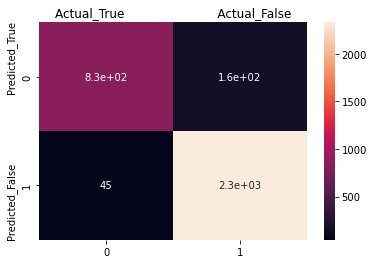

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(test_y, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title('Actual_True                        Actual_False')
ax.set_ylabel('Predicted_False                      Predicted_True')

# 2) Implement SVM model

### Model Fitting and Prediction 

In [75]:
from sklearn import svm

model = svm.SVC()
model.fit(counts_x_train, train_y)
predictions = model.predict(counts_x_test)

### Accuracy Score of Prediction on Held Out Test Set

In [76]:
print("Accuracy : %", (np.round(np.mean(predictions==test_y),4)) * 100)

Accuracy : % 91.64


### Accuracy Score and Prediction of testSet.txt

In [77]:
predictions_testSet = model.predict(test_set_x)
print("Accuracy on testSet.txt : %", np.round(np.mean(predictions_testSet==test_set_y),3) * 100)

Accuracy on testSet.txt : % 70.6


### Confusion Matrix of MultinomialNB Predictions on Held out Test Set

Text(33.0, 0.5, 'Predicted_False                      Predicted_True')

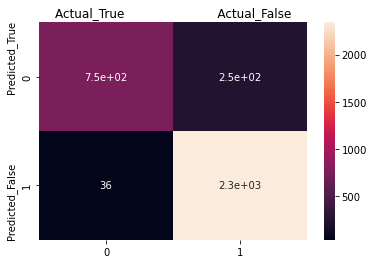

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(test_y, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title('Actual_True                        Actual_False')
ax.set_ylabel('Predicted_False                      Predicted_True')

# 3) Logistic Regression

### Model Fitting and Prediction 

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(counts_x_train, train_y)
predictions = model.predict(counts_x_test)

### Accuracy Score of Prediction on Held Out Test Set

In [80]:
print("Accuracy : %", np.round(np.mean(predictions==test_y),4) * 100)

Accuracy : % 94.07


### Accuracy Score and Prediction of testSet.txt

In [81]:
predictions_testSet = model.predict(test_set_x)
print("Accuracy on testSet.txt : %", np.round(np.mean(predictions_testSet==test_set_y),4) * 100)

Accuracy on testSet.txt : % 82.43


### Confusion Matrix of MultinomialNB Predictions on Held out Test Set

Text(33.0, 0.5, 'Predicted_False                      Predicted_True')

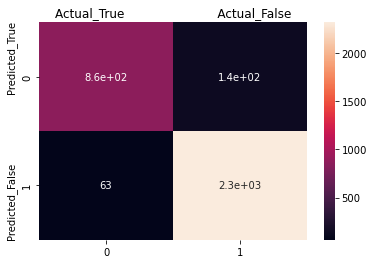

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(test_y, predictions)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title('Actual_True                        Actual_False')
ax.set_ylabel('Predicted_False                      Predicted_True')

# 4) Results Comparision

The three models used were MultinomialNB, SVC, and Logistic Regression with accuracies of %93.78, %91.64, and %94.07 with Logistic Regression performing the best on the held out test set. 

The results on the test data from testSet.txt file are as seen below:

MultinomialNB: 90.95

SVC: 70.6

Logistic Regression: 82.43

None of these models were hypertuned and could most likely see a slight increase in accraucy after tuning. MultinomialNB performed quite well with its independence assumption and performed the best on a real world data set. LR can fit non-linearity and most likely showed higher scores on the held out test set due to overfitting. SVC doesn't work as well with nonlinearity and thus performed the worse on both the heldout test set and the testSet.txt. I would choose to use the Multinomial Naive Bayes classification for positive and negative sentiment classification based on the results seen above. In the future I would most likely use grid search for hyper parameter tuning using cross validation, if available for the model.